In [43]:
# 이진크로스 엔트로피 손실함수 -> 분류 모델의 손실 값을 정의하는 함수

In [44]:
# 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [46]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [47]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species'].to_numpy()

In [48]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [49]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [50]:
# 모델 임포트
from sklearn.linear_model import SGDClassifier

In [66]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # log_loss: 이진 크로스 엔트로피
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [67]:
# 에폭 1회 늘리기
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.8


### 에포크와 과대/과소 적합

In [68]:
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [69]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

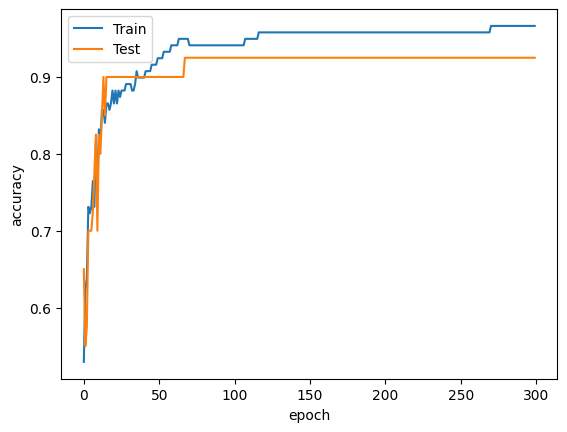

In [72]:
plt.plot(train_score, label='Train')
plt.plot(test_score, label='Test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
# 오버피팅이 일어나기 바로 전 학습횟수가 가장 좋다

In [73]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
